## import libs

In [8]:
# from pandas_datareader import data
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## data

In [14]:
start_date = '2022-01-01'
end_date = '2023-01-01'
goog_data = yf.download('GOOG', start=start_date, end=end_date)

goog_data_signal = pd.DataFrame(index=goog_data.index)
goog_data_signal['price'] = goog_data['Adj Close']
goog_data_signal['daily_difference'] = goog_data_signal['price'].diff()
goog_data_signal['signal'] = 0.0
goog_data_signal['signal'][:] = np.where(goog_data_signal['daily_difference'][:] > 0, 1.0, 0.0)

goog_data_signal['positions'] = goog_data_signal['signal'].diff()

goog_data_signal

[*********************100%***********************]  1 of 1 completed


,price,daily_difference,signal,positions
Date,,,,
2022-01-03,145.074493,NaN,0.0,NaN
2022-01-04,144.416504,-0.657990,0.0,0.0
2022-01-05,137.653503,-6.763000,0.0,0.0
2022-01-06,137.550995,-0.102509,0.0,0.0
2022-01-07,137.004501,-0.546494,0.0,0.0
...,...,...,...,...
2022-12-23,89.809998,1.549995,1.0,1.0
2022-12-27,87.930000,-1.879997,0.0,-1.0
2022-12-28,86.459999,-1.470001,0.0,0.0


## plot

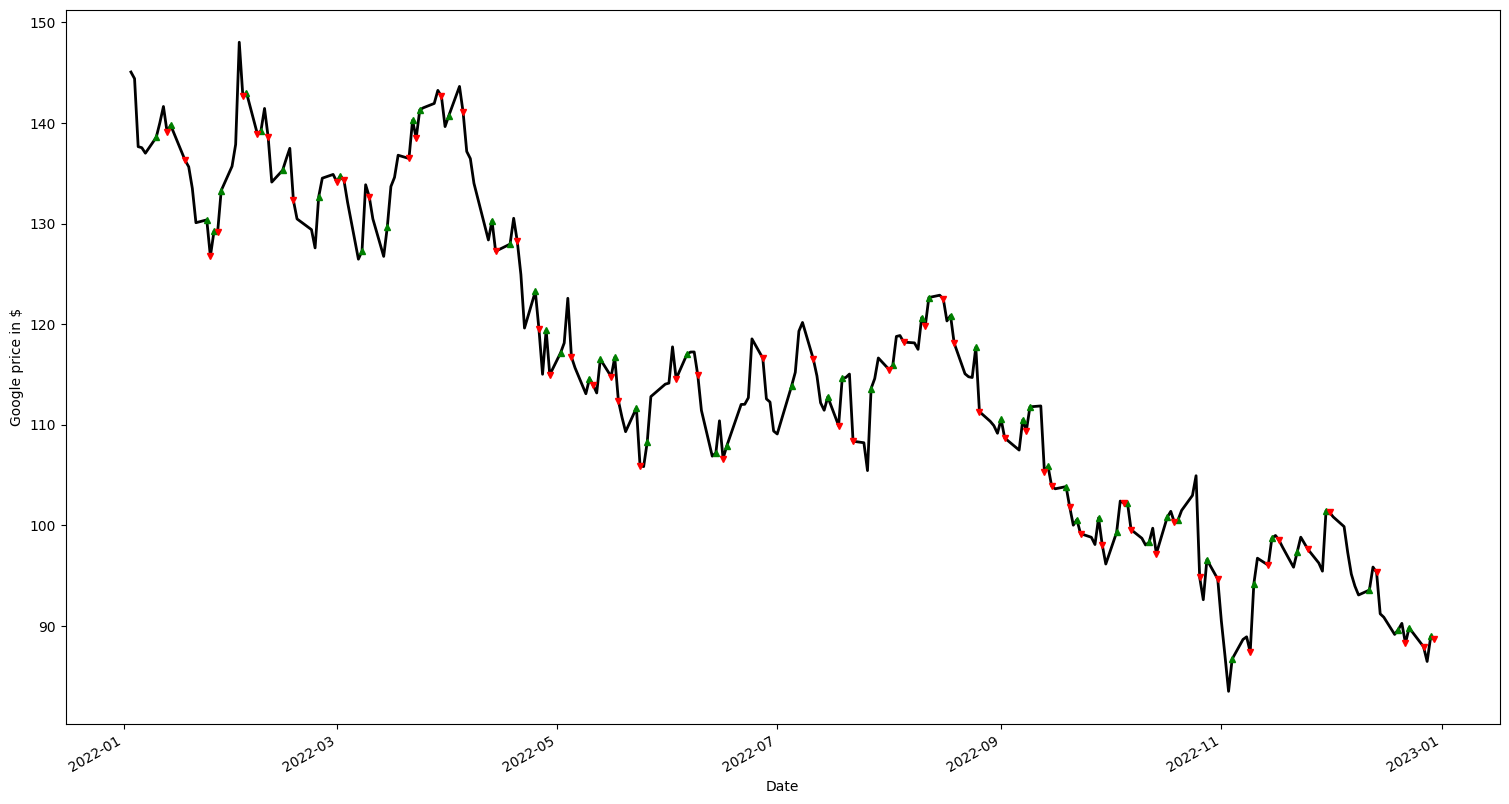

In [17]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data_signal['price'].plot(ax=ax1, color='black', lw=2.)

ax1.plot(goog_data_signal.loc[goog_data_signal.positions == 1.0].index,
         goog_data_signal.price[goog_data_signal.positions == 1.0],
         '^', markersize=5, color='green')

ax1.plot(goog_data_signal.loc[goog_data_signal.positions == -1.0].index,
         goog_data_signal.price[goog_data_signal.positions == -1.0],
         'v', markersize=5, color='red')

plt.show()

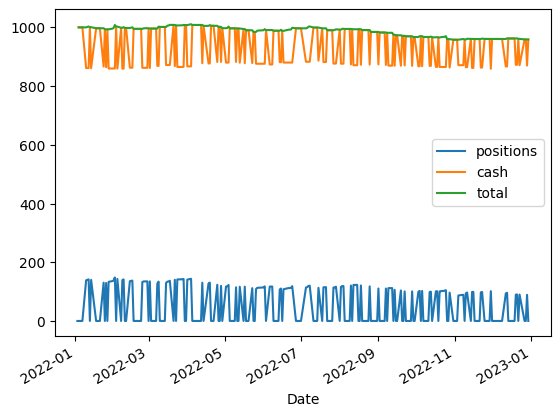

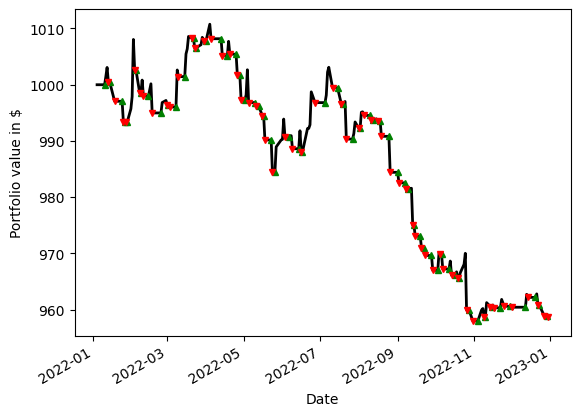

In [21]:
# Set the initial capital
initial_capital= float(1000.0)

positions = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)


positions['GOOG'] = goog_data_signal['signal']
portfolio['positions'] = (positions.multiply(goog_data_signal['price'], axis=0))
portfolio['cash'] = initial_capital - (positions.diff().multiply(goog_data_signal['price'], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']
portfolio.plot()
plt.show()


fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2. , color='black')
ax1.plot(portfolio.loc[goog_data_signal.positions == 1.0].index,portfolio.total[goog_data_signal.positions == 1.0],'^', markersize=5, color='green')
ax1.plot(portfolio.loc[goog_data_signal.positions == -1.0].index,portfolio.total[goog_data_signal.positions == -1.0],'v', markersize=5, color='red')
plt.show()